## Do all preliminary operations

In [1]:
%matplotlib inline

In [2]:
import os
import json
import matplotlib.pyplot as plt

In [3]:
json_wd = os.path.join(os.getcwd(),'json')
print (json_wd)

C:\Users\ephra\Documents\GitHub\PIDA_Project\json


In [4]:
from os import listdir
from os.path import isfile, join

jsonfiles = [f for f in listdir(json_wd) if isfile(join(json_wd, f))]

In [5]:
print(len(jsonfiles))

5


## Import JSON files

In [6]:
#input all json files and load into list
all_files=[]
for filename in jsonfiles:
    print(filename)#allows for easy debugging of JSON files
    file=open(os.path.join(json_wd, filename))
    data=json.load(file)
    all_files.append(data)
    file.close()
    #data=json.loads(filename)
print (all_files[0])

Civil Service List (Active).json
DOB Permit Issuance.json
DOB_Job_Application_Filings.json
For Hire Vehicles (FHV) - Active Drivers.json
For_Hire_Vehicles_(FHV)_-_Active.json
{'Civil Service List (Active)': {'first_name': ['name'], 'last_name': ['name']}}


## Make all the links using tags

In [7]:
all_links=[]
dataset_list=[]
for index, file in enumerate(all_files):
    #print (list(file.keys())[0], "is the name of the dataset")
    name=list(file.keys())[0]
    dataset_list.append(name)
    #print (list(file[name].keys()), "are the column names")
    for col in file[name].keys():
        #print ("Under column ", col, "are tags ", file[name][col])
        for tag in file[name][col]:
            #print ("Tag: ", tag)
            for secondindex in range (index+1, len(all_files)):
                secondname=list(all_files[secondindex].keys())[0]
                for secondcol in all_files[secondindex][secondname].keys():
                    #print ("Under second column ", secondcol, "are tags ", all_files[secondindex][secondname][secondcol])
                    for secondtag in all_files[secondindex][secondname][secondcol]:
                        #print ("Tag: ", secondtag)
                        #do all checking for common tags here
                        if tag.upper()==secondtag.upper() and index is not secondindex:
                            print (name, "and", secondname, "are linked at column", col, "and column", secondcol, "through tag", tag)
                            all_links.append([name.upper(), col.upper(), tag.upper() , secondname.upper(), secondcol.upper(), secondtag.upper()])
print (len(all_links))

Civil Service List (Active) and DOB Permit Issuance are linked at column first_name and column permittee's_first_name through tag name
Civil Service List (Active) and DOB Permit Issuance are linked at column first_name and column permittee's_last_name through tag name
Civil Service List (Active) and DOB Permit Issuance are linked at column first_name and column site_safety_mgr's_first_name through tag name
Civil Service List (Active) and DOB Permit Issuance are linked at column first_name and column site_safety_mgr's_last_name through tag name
Civil Service List (Active) and DOB Permit Issuance are linked at column first_name and column superintendent_name through tag name
Civil Service List (Active) and DOB Permit Issuance are linked at column first_name and column owner_s_first_name through tag name
Civil Service List (Active) and DOB Permit Issuance are linked at column first_name and column owner_s_last_name through tag name
Civil Service List (Active) and DOB Job Application Filin

## Reformat list for easy access

In [8]:
full_tree=[]#make tag most important
for sublist in all_links:
    tag=sublist[2]
    col1=sublist[1]
    col2=sublist[4]
    dataset1=sublist[0]
    dataset2=sublist[3]
    full_tree.append([tag, col1, dataset1, col2, dataset2])
#print (full_tree)

# Basic Data analysis 

## Number of times each tag is linked

In [9]:
tag_dict={}
for sublist in full_tree:
    try:
        tag_dict[sublist[0]]+=1
    except Exception:
        tag_dict[sublist[0]]=1
print (tag_dict)

{'NAME': 77, 'LOCATION': 47, 'STREETADDRESS': 4, 'ZIPCODE': 2, 'PHONE': 5, 'LATITUDE': 1, 'LONGITUDE': 1}


<Container object of 7 artists>

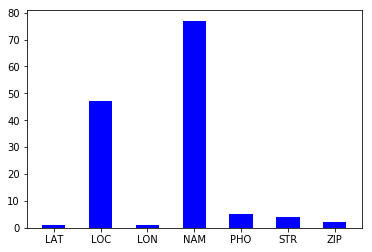

In [10]:
li=tag_dict.keys()
new_li=[]
for l in li:
    new_li.append(l[0:3])
plt.bar(new_li, tag_dict.values(), .5, color='b')#resize as needed

## Number of times each column has associated tags

In [11]:
col_dict={}
for sublist in full_tree:
    try:
        col_dict[sublist[1]]+=1
    except Exception:
        col_dict[sublist[1]]=1
    try:
        col_dict[sublist[3]]+=1
    except Exception:
        col_dict[sublist[3]]=1
print (col_dict)

{'FIRST_NAME': 13, "PERMITTEE'S_FIRST_NAME": 8, "PERMITTEE'S_LAST_NAME": 8, "SITE_SAFETY_MGR'S_FIRST_NAME": 8, "SITE_SAFETY_MGR'S_LAST_NAME": 8, 'SUPERINTENDENT_NAME': 8, 'OWNER_S_FIRST_NAME': 8, 'OWNER_S_LAST_NAME': 8, "APPLICANT'S_FIRST_NAME": 11, "APPLICANT'S_LAST_NAME": 11, "OWNER'S_FIRST_NAME": 11, "OWNER'S_LAST_NAME": 11, 'NAME': 28, 'LAST_NAME': 13, 'BOROUGH': 14, 'STREET_NAME': 18, "OWNER'S_HOUSE_NUMBER": 6, "OWNER'S_HOUSE_STREET_NAME": 18, 'ZIP': 8, 'GIS_LATITUDE': 8, 'GIS_LONGITUDE': 8, 'BASE_ADDRESS': 12, 'ZIP_CODE': 9, "PERMITTEE'S_PHONE": 2, 'OWNERS_PHONE': 3, 'BASE_TELEPHONE_NUMBER': 3, 'OWNER_S_ZIP_CODE': 9, "OWNER'S_PHONE": 2}


<Container object of 28 artists>

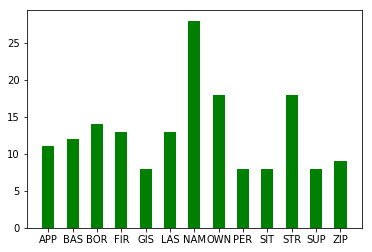

In [12]:
li=col_dict.keys()
new_li=[]
for l in li:
    new_li.append(l[0:3])
plt.bar(new_li, col_dict.values(), .5, color='g')

## Number of links each dataset has

In [13]:
dataset_dict={}
for sublist in full_tree:
    try:
        dataset_dict[sublist[2]]+=1
    except Exception:
        dataset_dict[sublist[2]]=1
    try:
        dataset_dict[sublist[4]]+=1
    except Exception:
        dataset_dict[sublist[4]]=1
print (dataset_dict)

{'CIVIL SERVICE LIST (ACTIVE)': 26, 'DOB PERMIT ISSUANCE': 108, 'DOB JOB APPLICATION FILINGS': 97, 'FOR HIRE VEHICLES (FHV) - ACTIVE DRIVERS': 14, 'FOR HIRE VEHICLES (FHV) - ACTIVE': 29}


<Container object of 5 artists>

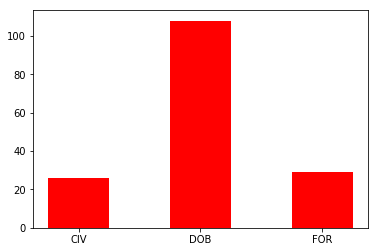

In [14]:
li=dataset_dict.keys()
new_li=[]
for l in li:
    new_li.append(l[0:3])
plt.bar(new_li, dataset_dict.values(), .5, color='r')

## Organize linking by tree

In [15]:
full_tree=sorted(full_tree)

In [16]:
from anytree import Node, RenderTree, Resolver
from anytree.search import find
resolver=Resolver('name')
dummy=Node('All_Tags')
for sublist in full_tree:#Tags
    f=find(dummy, lambda node: node.name == sublist[0] and node.depth== 1)
    if f is None:
        n=Node(sublist[0], parent=dummy)
        l=[]
        for lis in full_tree:
            if lis[1] not in l and lis[0] == n.name:
                l.append(lis[1])
            if lis[3] not in l and lis[0] == n.name:
                l.append(lis[3])
        for lis in l:
            p=Node(lis, parent=n)
            q=[]
            for li in full_tree:
                #print (li[2],"second:" ,li[4])
                #print ("next")
                if li[0] == n.name and li[1]==p.name:
                    q.append(li[2])
                if li[0] == n.name  and li[3]==p.name:
                    q.append(li[4])
            q=list(set(q))
            for li in q:
                r=Node(li, parent=p)
            
#for pre, fill, node in RenderTree(dummy):
#    print("%s%s" % (pre, node.name))

In [17]:
# from anytree import Node, RenderTree, Resolver
# from anytree.search import find
# resolver=Resolver('name')
# dummy=Node('All_Tags')
# for sublist in full_tree:#Tags
#     f=find(dummy, lambda node: node.name == sublist[0])
#     if f is None:
#         n=Node(sublist[0], parent=dummy)
# for sublist in full_tree:#Columns
#     f=find(dummy, lambda node: node.name == sublist[1])
#     if f is None:
#         g=find(dummy, lambda node: node.name == sublist[0])
#         n=Node(sublist[1], parent=g)   
#     f=find(dummy, lambda node: node.name == sublist[3])
#     if f is None:
#         g=find(dummy, lambda node: node.name == sublist[0])
#         n=Node(sublist[3], parent=g) 
# o=None
# p=None
# for sublist in full_tree:#todo fix this part up
#     try:
#         g=find(dummy, lambda node: node.name == sublist[1])
#         n=Node(sublist[2], parent=g)
#     except Exception:
#         pass
#     try:
#         g=find(dummy, lambda node: node.name == sublist[3])
#         n=Node(sublist[4], parent=g)
#     except Exception:
#         pass

In [18]:
dummy.children #all the tags should be listed

(Node('/All_Tags/LATITUDE'),
 Node('/All_Tags/LOCATION'),
 Node('/All_Tags/LONGITUDE'),
 Node('/All_Tags/NAME'),
 Node('/All_Tags/PHONE'),
 Node('/All_Tags/STREETADDRESS'),
 Node('/All_Tags/ZIPCODE'))

In [19]:
# all_leafs=[]
# should_leafs=[]
# def get_leafs(node):
#     for child in node.children:
#         get_leafs(child)
#     if len(node.children) is 0 and node.depth is 3:
#         all_leafs.append(node)
# def should_be_leafs(node):
#     for child in node.children:
#         should_be_leafs(child)
#     if len(node.children) is 0:
#         if node.name not in should_leafs  and node.depth is 3:
#             should_leafs.append(node.name)

In [20]:
# get_leafs(dummy)
# should_be_leafs(dummy)
#print (all_leafs)

In [21]:
for pre, fill, node in RenderTree(dummy):
    print("%s%s" % (pre, node.name))

All_Tags
├── LATITUDE
│   └── GIS_LATITUDE
│       ├── DOB PERMIT ISSUANCE
│       └── DOB JOB APPLICATION FILINGS
├── LOCATION
│   ├── BOROUGH
│   │   ├── DOB PERMIT ISSUANCE
│   │   └── DOB JOB APPLICATION FILINGS
│   ├── BASE_ADDRESS
│   │   └── FOR HIRE VEHICLES (FHV) - ACTIVE
│   ├── GIS_LATITUDE
│   │   └── DOB JOB APPLICATION FILINGS
│   ├── GIS_LONGITUDE
│   │   └── DOB JOB APPLICATION FILINGS
│   ├── OWNER'S_HOUSE_NUMBER
│   │   └── DOB JOB APPLICATION FILINGS
│   ├── OWNER'S_HOUSE_STREET_NAME
│   │   ├── DOB PERMIT ISSUANCE
│   │   └── DOB JOB APPLICATION FILINGS
│   ├── STREET_NAME
│   │   ├── DOB PERMIT ISSUANCE
│   │   └── DOB JOB APPLICATION FILINGS
│   ├── ZIP
│   │   └── DOB JOB APPLICATION FILINGS
│   ├── OWNER_S_ZIP_CODE
│   │   └── DOB PERMIT ISSUANCE
│   └── ZIP_CODE
│       └── DOB PERMIT ISSUANCE
├── LONGITUDE
│   └── GIS_LONGITUDE
│       ├── DOB PERMIT ISSUANCE
│       └── DOB JOB APPLICATION FILINGS
├── NAME
│   ├── APPLICANT'S_FIRST_NAME
│   │   └── DOB JOB AP

In [25]:
#This will allow working with 1 subtree by tag at a time
l=dummy.children
print (l[0])
for pre, fill, node in RenderTree(l[0]):
    print("%s%s" % (pre, node.name))

Node('/All_Tags/LATITUDE')
LATITUDE
└── GIS_LATITUDE
    ├── DOB PERMIT ISSUANCE
    └── DOB JOB APPLICATION FILINGS
